In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading our dataset
bigData_df = pd.read_csv("bigdataTrain.csv")
bigData_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
bigData_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We see Item_Weight anf Outlet_Size columns has null values

In [4]:
bigData_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We see from here that the minimum value of Item_Visibility is 0 which seems as a null data also.

In [5]:
bigData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
bigData_df['Item_Weight'].fillna(bigData_df['Item_Weight'].mean(), inplace=True)
bigData_df['Outlet_Size'].fillna(bigData_df['Outlet_Size'].mode()[0], inplace=True)
bigData_df['Item_Visibility'].replace(0,bigData_df['Item_Visibility'].mean(), inplace=True)

In [7]:
bigData_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

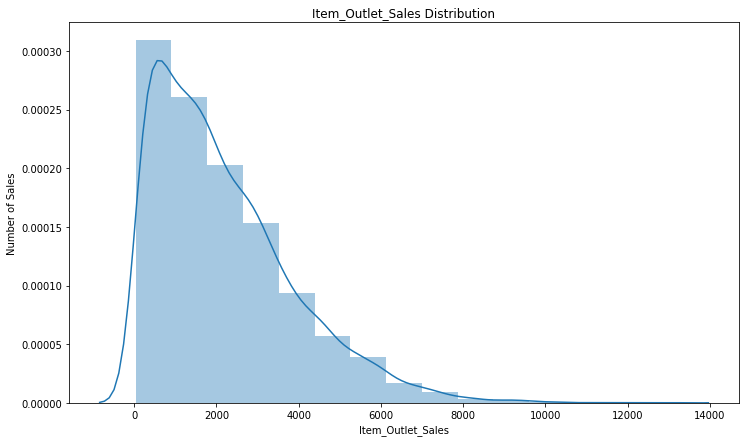

In [8]:

plt.figure(figsize=(12,7))
sns.distplot(bigData_df.Item_Outlet_Sales, bins = 15)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

There is right skewness in the target variable column

In [9]:
bigData_df.Item_Outlet_Sales.skew()

1.1775306028542798

In [10]:
numerical_bigMart_df= bigData_df.select_dtypes(include=[np.number])
numerical_bigMart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


Lets check the heat map of the correlation of the numerical data

(5.0, 0.0)

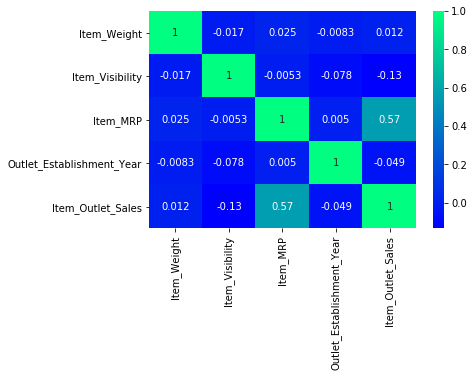

In [11]:
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(numerical_bigMart_df.corr(), annot=True, cmap='winter');
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Categorical data count plots

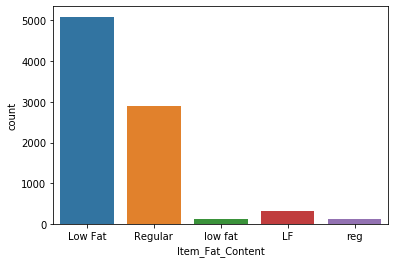

In [12]:
sns.countplot(bigData_df.Item_Fat_Content)

Low Fat food are more and regular food items are less in the data set.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

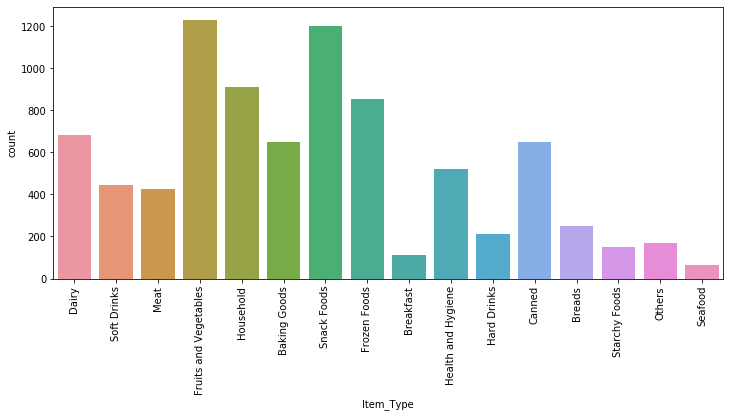

In [13]:
plt.figure(figsize=(12,5))
g= sns.countplot(bigData_df.Item_Type)
plt.xticks(rotation=90)

Fruits and Vegetables and snack food data is present majorly in the dataset.
Seafood data is lowest.

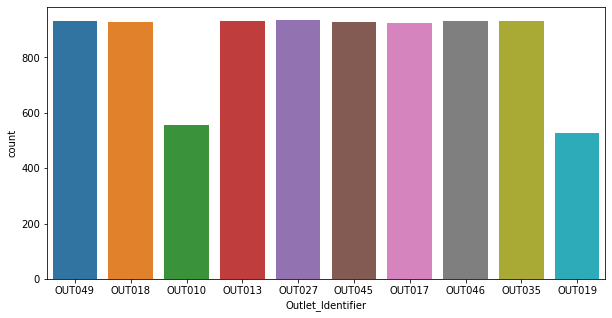

In [14]:
plt.figure(figsize=(10,5))
g= sns.countplot(bigData_df.Outlet_Identifier)

Mostly all outlet data is present equally while outlet 10 and 19 data is less.

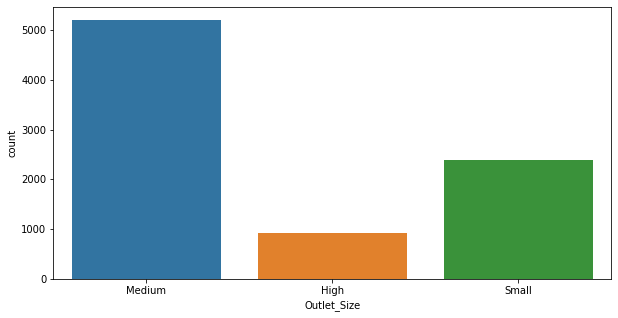

In [15]:
plt.figure(figsize=(10,5))
g= sns.countplot(bigData_df.Outlet_Size)

Medium size outlet data count is more as compared to High and small sized outlets

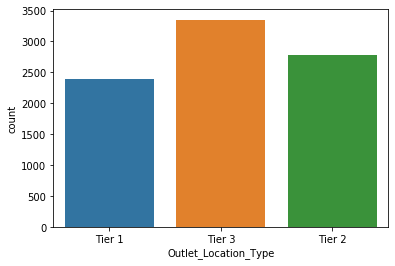

In [16]:
sns.countplot(bigData_df.Outlet_Location_Type)

There are 3 types of outlet location type
Tier 3 type of outlet location is present.

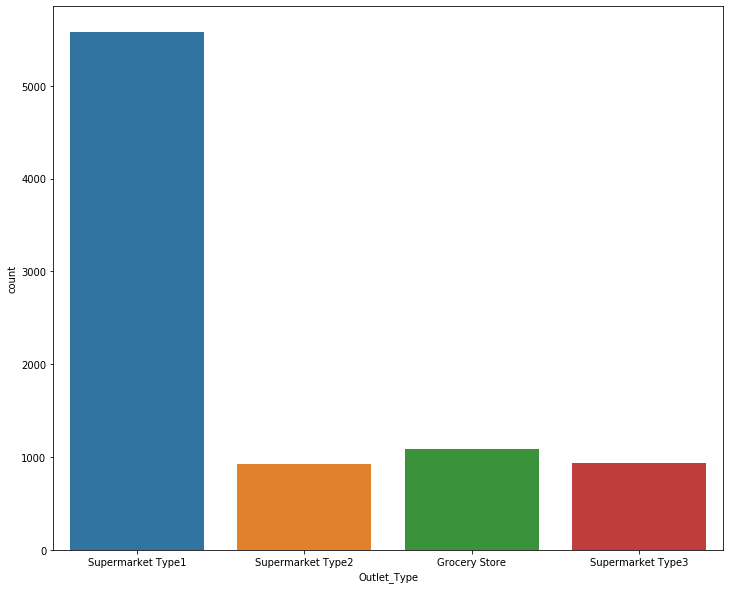

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(bigData_df.Outlet_Type)

supermarket type 1 data is the highest in the count

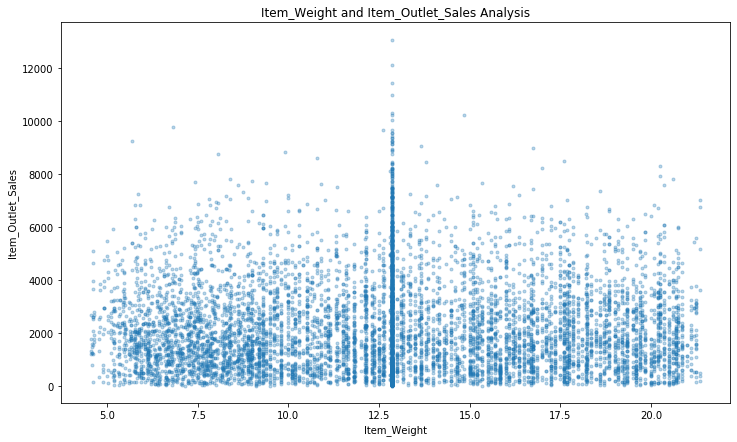

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(bigData_df.Item_Weight, bigData_df["Item_Outlet_Sales"],'.', alpha = 0.3)

Items with less weight are largely sold while the datapoints scatters are less of the item weight increases

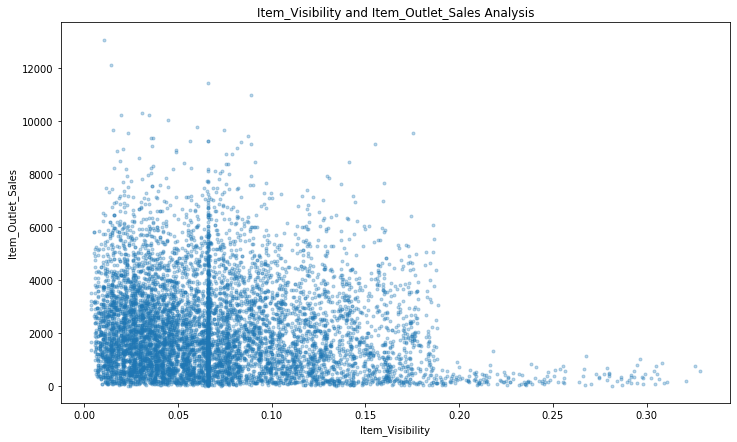

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(bigData_df.Item_Visibility, bigData_df["Item_Outlet_Sales"],'.', alpha = 0.3)

Visibility of the item do not contribute much in the sales.
all items have more or less approx same chances of visibility

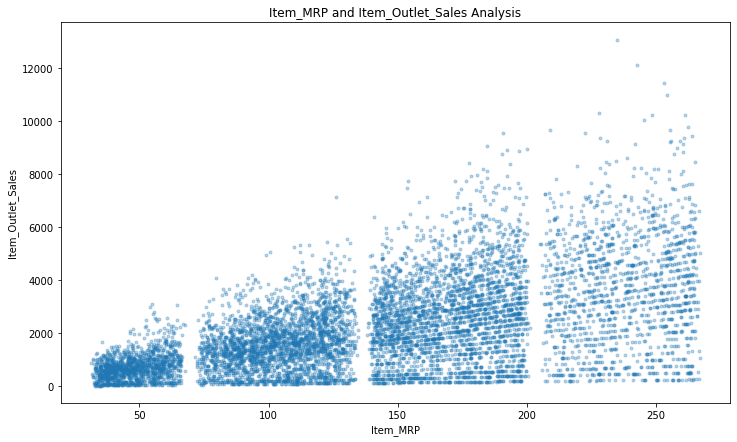

In [20]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(bigData_df.Item_MRP, bigData_df["Item_Outlet_Sales"],'.', alpha = 0.3)

Low MRP items are sold the most. while the high MRP items are sold less.

# Bivariate analysis

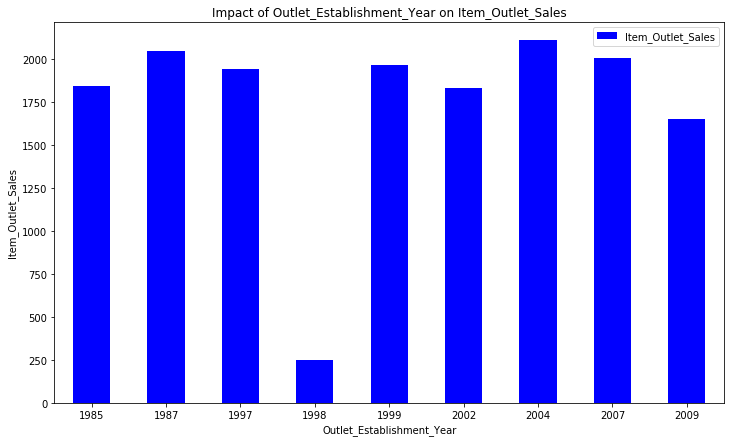

In [21]:
Outlet_Establishment_Year_pivot = \
bigData_df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Establshment year does not imapct much in the sales.

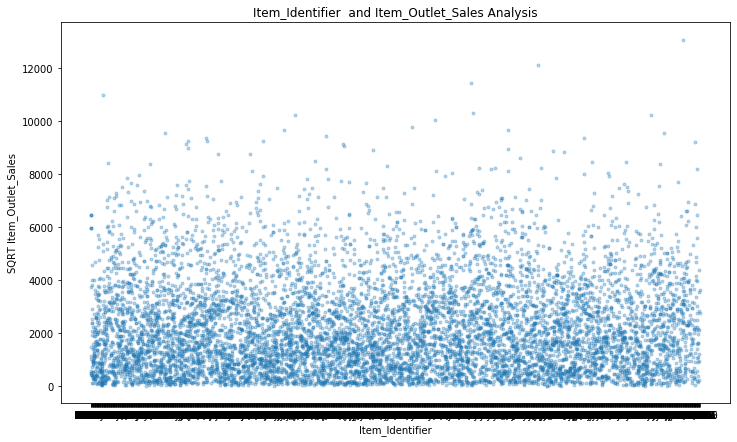

In [22]:
categorical_features = bigData_df.select_dtypes(include=[np.object])
categorical_features.dtypes
plt.figure(figsize=(12,7))
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(categorical_features.Item_Identifier , numerical_bigMart_df["Item_Outlet_Sales"],'.', alpha = 0.3)

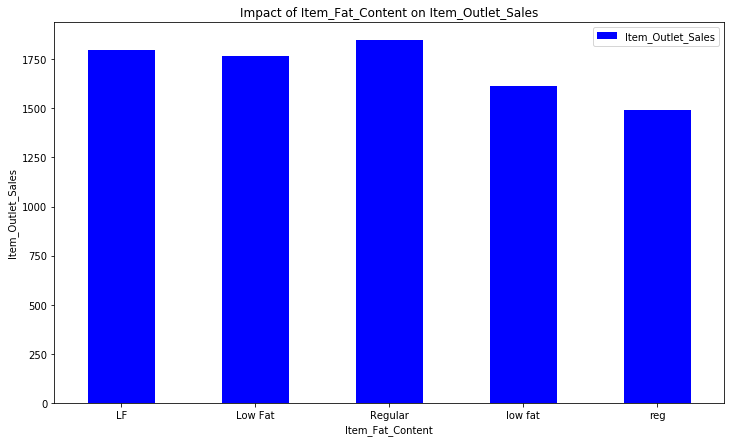

In [23]:
Item_Fat_Content_pivot = \
bigData_df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

all types of fat content food are sold with regulat fat content as the most sold product.

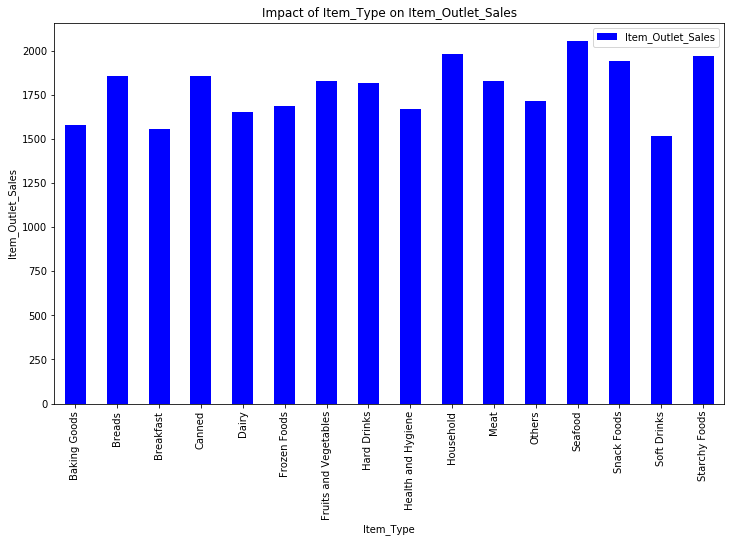

In [24]:
Item_Fat_Content_pivot=\
bigData_df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

Seafood is the highest sold item type in the dataset
Softdrinks have the lowest sale.

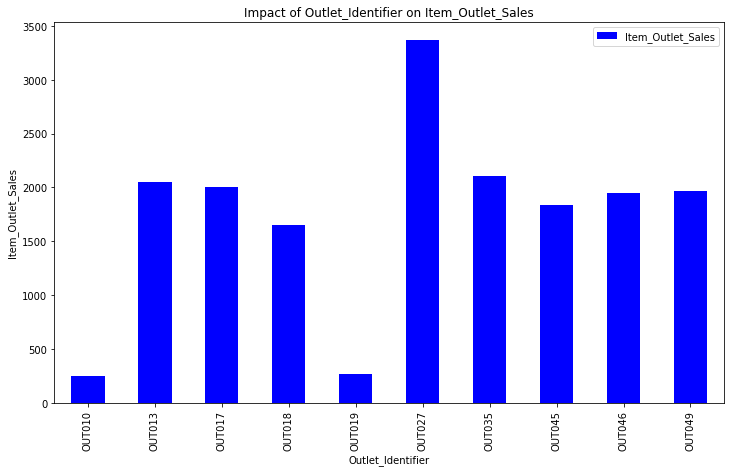

In [25]:
Outlet_Identifier_pivot=\
bigData_df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

Outlet 27 has the highest sales while 10 and 19 have the lowest sale.

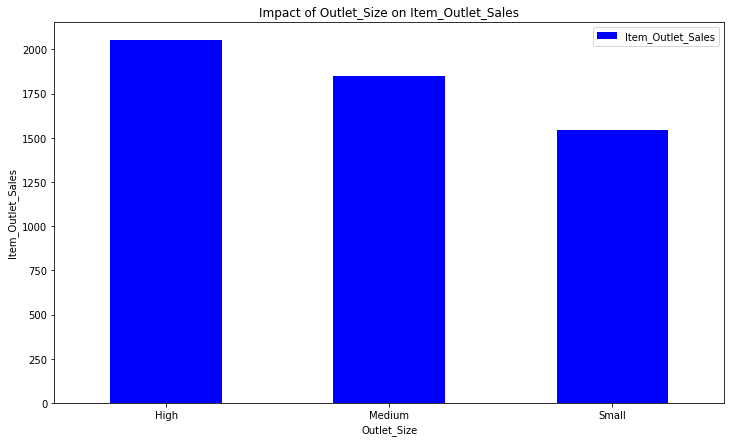

In [26]:
Outlet_Size_pivot=\
bigData_df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

High outlet size have the highest sale while the small outlet size have the lowest

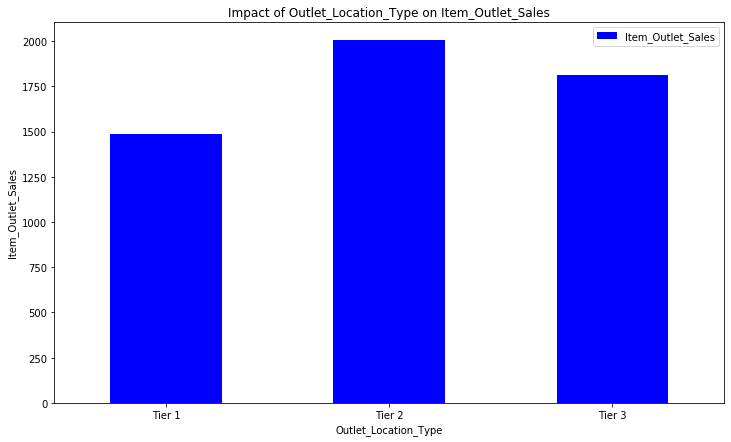

In [27]:
Outlet_Location_Type =\
bigData_df.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Tier 2 outlet location type has the highest sales.

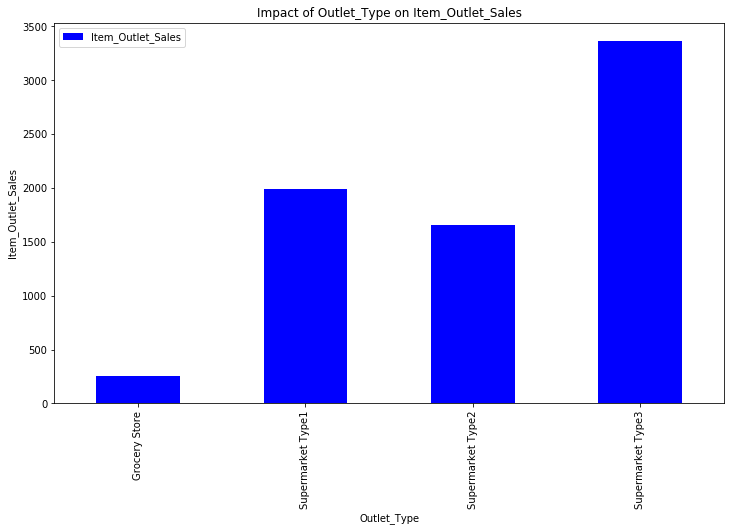

In [28]:
Outlet_Type =\
bigData_df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

Super marlet type 3 has the highest sales while the grocery store has the lowest.

In [29]:

# df_scaled = bigData_df.copy()
# col_names = list(df_scaled. select_dtypes(include=[np.number]))
# features = df_scaled[col_names]
# scaler = MinMaxScaler()
# df_scaled[col_names] = scaler.fit_transform(features.values)

In [30]:
# df_scaled_categorical = bigData_df.copy()
# col_names = list(df_scaled_categorical. select_dtypes(include=[np.object]))
# features = df_scaled_categorical[col_names]
# lable_encode = LabelEncoder()
# df_scaled_categorical[col_names] = features.apply(lable_encode.fit_transform)

In [31]:
# df_scaled_categorical[col_names]

In [32]:
# df_scaled[col_names]

In [33]:
# final_df= pd.concat([df_scaled_categorical[col_names],df_scaled[col_names]], axis=1, how='outer')

In [34]:
# final_df.shape

In [35]:
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

In [36]:
numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

In [37]:
from sklearn.preprocessing import LabelEncoder
lable_encode = LabelEncoder()
for i in categorical_columns:
    bigData_df[i]=lable_encode.fit_transform(bigData_df[i].values)

In [38]:
bigData_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [39]:
#min Max scaling
for col in bigData_df.columns:
    bigData_df[col]=(bigData_df[col]-min(bigData_df[col]))/(max(bigData_df[col])-min(bigData_df[col]))



In [40]:
bigData_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.25,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,0.50,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.25,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,0.50,0.192593,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.25,0.192593,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.25,0.163812,0.866667,0.777729,0.111111,0.083333,0.0,1.0,0.333333,0.210293
8519,0.575738,0.227746,0.50,0.133638,0.000000,0.326263,0.777778,0.708333,0.5,0.5,0.333333,0.039529
8520,0.870988,0.359929,0.25,0.097321,0.533333,0.228492,0.666667,0.791667,1.0,0.5,0.333333,0.088850
8521,0.437099,0.158083,0.50,0.436080,0.866667,0.304939,0.333333,1.000000,0.5,1.0,0.666667,0.138835


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
Y = bigData_df['Item_Outlet_Sales']
X = bigData_df.drop('Item_Outlet_Sales',axis=1)
best_rstate=0
score=0
algo_list= [LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),SVR()]
for algo in algo_list:
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=r2_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=i
    print(f"Best R2 Score {score*100} found with {algo} at random state {best_rstate} \n")

Best R2 Score 52.9967326344069 found with LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) at random state 80 

Best R2 Score 52.9967326344069 found with DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') at random state 80 

Best R2 Score 54.550489577479496 found with KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') at random state 60 

Best R2 Score 55.45148387241231 found with AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None) at random state 57

In [44]:
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=60)
mod=SVR(gamma='auto_deprecated')
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)
tempaccu=r2_score(y_test,y_pred)


score = cross_val_score(mod,X,Y,cv=20,scoring='r2').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 57.76014426056647


In [45]:
import joblib
joblib.dump(mod, 'BigMart_SVR.obj')

['BigMart_SVR.obj']